## Dataset overview

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [94]:
df = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
df.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

## Check for sample representativity

In [97]:
df["JobRoleInterest"].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                  2.030892
  Mobile Developer                                                                                                                                                  

* People could be interested in more than one subject
* Most of the peopole is still interested in one subject

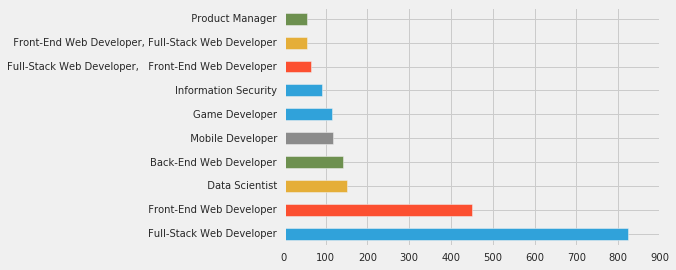

In [101]:
plt.style.use("fivethirtyeight")
df["JobRoleInterest"].value_counts(ascending=False)[:10].plot.barh();

* From the chart above, there are more than 1500 people who are interested in web and mobile development 

## Location and density for new coders

In [102]:
df["CountryLive"].value_counts(normalize=True).head()*100

United States of America    37.760824
India                        9.128847
United Kingdom               4.936098
Canada                       4.016693
Brazil                       2.373500
Name: CountryLive, dtype: float64

In [103]:
df["CountryLive"].value_counts().head()

United States of America    5791
India                       1400
United Kingdom               757
Canada                       616
Brazil                       364
Name: CountryLive, dtype: int64

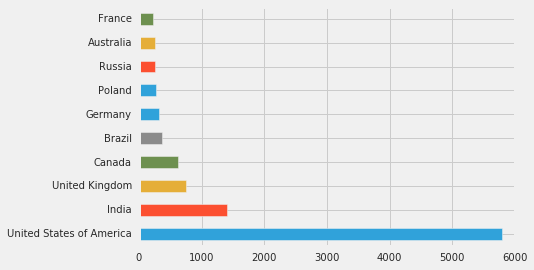

In [105]:
plt.style.use("fivethirtyeight")
df["CountryLive"].value_counts()[:10].plot.barh();

* The top-3 countries the the new codes live are USA, India, and UK
* Based on this results, USA and India should be the focus of the advertisement

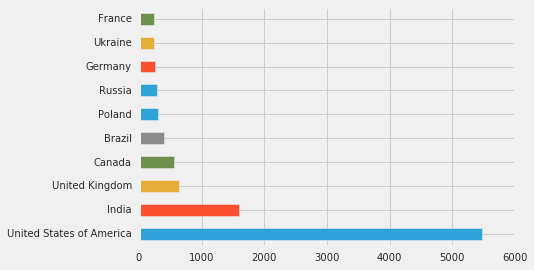

In [106]:
plt.style.use("fivethirtyeight")
df["CountryCitizen"].value_counts()[:10].plot.barh();

* Both CountryCitizen and CountryLive show similar results

## Money spent for learning

In [107]:
df["MonthsProgramming"] = df["MonthsProgramming"].replace(0, 1)
df["Money per month"] = df["MoneyForLearning"] / df["MonthsProgramming"]

In [108]:
df["Money per month"].isnull().sum()

1995

In [109]:
df = df.dropna(subset=["Money per month"])

In [110]:
df["Money per month"].isnull().sum()

0

In [111]:
df_target = df[(df["CountryLive"] == "United States of America") 
               | (df["CountryLive"] == "India")
                | (df["CountryLive"] == "United Kingdom")
                 | (df["CountryLive"] == "Canada")]

In [112]:
df_target["CountryLive"].value_counts()

United States of America    5471
India                       1221
United Kingdom               698
Canada                       578
Name: CountryLive, dtype: int64

In [113]:
print("Mean" + "-"*20)
df_target.groupby(by=["CountryLive"])["Money per month"].mean().sort_values(ascending=False).head()

Mean--------------------


CountryLive
United States of America    206.297711
Canada                      118.434054
India                        66.526198
United Kingdom               55.774980
Name: Money per month, dtype: float64

In [114]:
print("Std" + "-"*20)
df_target.groupby(by=["CountryLive"])["Money per month"].std().sort_values(ascending=False).head()

Std--------------------


CountryLive
United States of America    1807.536639
India                        442.078116
Canada                       365.956679
United Kingdom               238.509986
Name: Money per month, dtype: float64

In [115]:
print("Median" + "-"*20)
df_target.groupby(by=["CountryLive"])["Money per month"].().sort_values(ascending=False).head()

SyntaxError: invalid syntax (<ipython-input-115-91f2ccb365fe>, line 2)

In [116]:
df_target.groupby(by=["CountryLive"])["Money per month"].describe().sort_values(["mean"], ascending=False)

,count,mean,std,min,25%,50%,75%,max
CountryLive,,,,,,,,
United States of America,5471.0,206.297711,1807.536639,0.0,0.0,4.166667,44.444444,80000.0
Canada,578.0,118.434054,365.956679,0.0,0.0,1.631944,25.000000,5000.0
India,1221.0,66.526198,442.078116,0.0,0.0,0.000000,8.333333,10000.0
United Kingdom,698.0,55.774980,238.509986,0.0,0.0,0.962963,20.000000,3500.0


/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


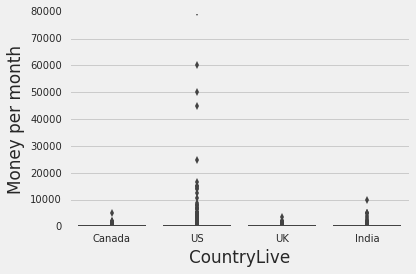

In [119]:
sns.boxplot(x="CountryLive", y="Money per month", data=df_target)
plt.xticks(np.arange(4), ["Canada", "US", "UK", "India"])
plt.tight_layout();